In [1]:
 %gui qt
import scipy
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.io.matlab import mat_struct
import h5py
import pyqtgraph as pg
# fwd_i = scipy.io.loadmat("Fwd_I.mat")
# trans_i = scipy.io.loadmat("Trans_I.mat")


                


In [4]:
fwd_q_data_times = pd.read_csv("fwd_q.csv")
#fwd_q_data.insert(0, "time", [0.0012, 0.0019, 0.0026, 0.0033, 0.0041, 0.0048, 0.0055])
#fwd_q_data_times.insert(0, "time", [0.0012, 0.0019, 0.0026, 0.0033, 0.0041, 0.0048, 0.0055])




In [5]:
fwd_q_data_times.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.16374,0.16375,0.16376,0.16377,0.16378,0.16379,0.16380,0.16381,0.16382,0.16383
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,-508,2034,-1037,-1251,1985,-251,-1794,1602,574,-2053
2,963,1303,-1972,171,1822,-1563,-649,2051,-903,-1367,...,870,1378,-1938,68,1866,-1494,-747,2054,-813,-1441
3,1901,-2,-1905,1433,807,-2066,733,1484,-1882,-81,...,1859,101,-1944,1356,898,-2061,637,1553,-1835,-183
4,1958,-1307,-974,2045,-574,-1609,1791,250,-1988,1240,...,1985,-1226,-1062,2032,-474,-1671,1737,350,-2014,1157


In [12]:
#trying to plot between 19 and 26 milliseconds
# I can just directly plot it by assigning times in between 26 and 19

times = np.linspace(0.0019, 0.0026, 16384)
fwd_q = fwd_q_data.loc[4].to_numpy()
#fwd_q
#np.save('fwd_q_19', fwd_q)

pg.plot(times[1:500], fwd_q[1:500])


In [7]:
a = np.load('fwd_q_19.npy')
a

array([ 4.100e-03,  1.958e+03, -1.307e+03, ...,  3.500e+02, -2.014e+03,
        1.157e+03])

In [13]:
max(a)

NameError: name 'a' is not defined

In [ ]:
# #times = np.linspace(0.0019, 0.0026, 16384)
# test = float(times[1] - 0.0019)
# test

fwd_i_data = pd.read_csv("fwd_i.csv")
fwd_i_data


In [14]:
fwd_i_data = pd.read_csv("fwd_i.csv")
fwd_i = fwd_i_data.loc[1].to_numpy()
#np.save('fwd_i_19', fwd_i)

fwd_q_data = pd.read_csv("fwd_q.csv")
fwd_q = fwd_q_data.loc[1].to_numpy()
#np.save('fwd_q_19', fwd_q)


In [15]:
trans_i_data = pd.read_csv("trans_i.csv")
trans_i = trans_i_data.loc[1].to_numpy()
#np.save('trans_i_19', trans_i)
trans_q_data = pd.read_csv("trans_q.csv")
trans_q = trans_q_data.loc[1].to_numpy()
#np.save('trans_q_19', trans_q)

In [16]:
len(fwd_q)

16384

In [19]:
fwd_r = fwd_q[:]*np.cos(2*np.pi*times) + fwd_i[:]*np.sin(2*np.pi*times)
fwd_r_fft = scipy.fft.fft(fwd_r)
frequencies = scipy.fft.fftfreq(np.size(times), 44.44e-6)

plot = pg.plot(frequencies, abs(fwd_r_fft)).setLogMode(False, True)

In [21]:
trans_qs = pd.read_csv("trans_q.csv")
trans_is = pd.read_csv("trans_i.csv")

trans_is

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.16374,0.16375,0.16376,0.16377,0.16378,0.16379,0.16380,0.16381,0.16382,0.16383
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,285,-354,-70,363,-236,-203,386,-80,-305,343
2,86,-360,238,234,-361,90,341,-304,-73,390,...,87,-384,195,219,-387,42,320,-321,-114,372
3,-201,-251,363,-48,-349,292,108,-391,172,247,...,-176,-259,365,-21,-352,285,131,-388,156,262
4,-367,2,351,-283,-149,385,-148,-277,356,7,...,-358,-18,358,-268,-169,383,-134,-294,347,23
5,-372,250,172,-390,108,292,-346,-45,367,-244,...,-380,230,182,-393,86,300,-343,-69,371,-232
6,-210,379,-83,-320,326,74,-378,216,217,-378,...,-227,372,-67,-334,310,86,-392,191,226,-383


In [22]:
trans_i = trans_is.loc[1].to_numpy()
trans_q = trans_qs.loc[1].to_numpy()

trans_r = trans_q*np.cos(2*np.pi*times) + trans_i*np.sin(2*np.pi*times)
trans_fft = scipy.fft.fft(trans_r)
freq_trans = scipy.fft.fftfreq(np.size(times), 44.44e-6)

pg.plot(freq_trans, abs(trans_fft)).setLogMode(False, True)

In [5]:
from scipy import signal
import numpy as np

In [44]:
unsampled = np.linspace(-2*np.pi,2*np.pi, 10)
sine = np.sin(unsampled)
upsampled = signal.resample(sine, 600)

[]

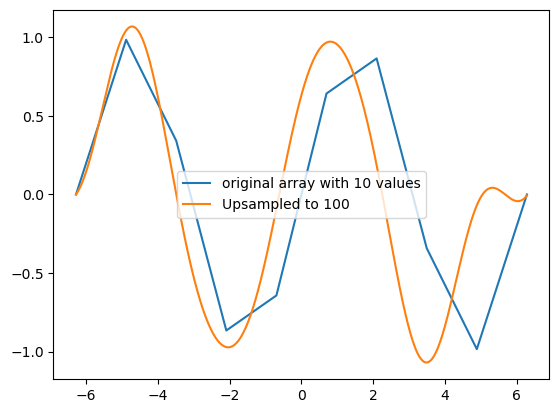

In [46]:
import matplotlib.pyplot as plt

plt.plot( unsampled, np.sin(unsampled), label = "original array with 10 values")
plt.plot( np.linspace(-2*np.pi,2*np.pi, 600), upsampled, label = "Upsampled to 100")
plt.legend()
plt.plot()

In [37]:
print(upsampled)

[-6.66133815e-17  2.75104853e-02  6.68201653e-02  1.17578523e-01
  1.78708704e-01  2.48502602e-01  3.24758258e-01  4.04947456e-01
  4.86399326e-01  5.66484844e-01  6.42787610e-01  7.13247935e-01
  7.76270047e-01  8.30785727e-01  8.76271727e-01  9.12722371e-01
  9.40582554e-01  9.60649526e-01  9.73954174e-01  9.81633701e-01
  9.84807753e-01  9.84468986e-01  9.81397113e-01  9.76102731e-01
  9.68804046e-01  9.59436266e-01  9.47690330e-01  9.33074928e-01
  9.14993886e-01  8.92829885e-01  8.66025404e-01  8.34152615e-01
  7.96965540e-01  7.54430060e-01  7.06729941e-01  6.54249695e-01
  5.97537608e-01  5.37254207e-01  4.74112862e-01  4.08819745e-01
  3.42020143e-01  2.74257126e-01  2.05946882e-01  1.37372961e-01
  6.86993434e-02 -8.88178420e-17 -6.86993434e-02 -1.37372961e-01
 -2.05946882e-01 -2.74257126e-01 -3.42020143e-01 -4.08819745e-01
 -4.74112862e-01 -5.37254207e-01 -5.97537608e-01 -6.54249695e-01
 -7.06729941e-01 -7.54430060e-01 -7.96965540e-01 -8.34152615e-01
 -8.66025404e-01 -8.92829

In [38]:
print(sine)

[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
